<a href="https://colab.research.google.com/github/t6nand/mloptimization/blob/master/ex4_set1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Setup for allowing use of latex within matplotlib and other packages

In [0]:
# ! sudo apt-get install texlive-latex-recommended #1
# ! sudo apt-get install dvipng texlive-fonts-recommended #2
# ! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
# ! unzip type1cm.zip -d /tmp/type1cm #4
# ! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
# ! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
# ! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm #7
# ! sudo texhash #8

Import packages and initialize plot formatting

In [0]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 7
plt.rcParams['lines.markersize'] = 4
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 150

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Initialize $x$ as $n=1000$ random uniformly distributed samples in the interval $[0, 1]$. 

Using an adittional variable $\epsilon$ as normally distributed with $\mu=0$ and 
$\sigma^2=0.25$, the following expression is calculated:
\begin{equation}
y_i = x_i + \epsilon_i
\end{equation}*italicized text*

In [0]:
x = np.random.uniform(0, 1, 1000)
epsilons = np.random.normal(0, 0.5, 1000)
y = x + epsilons

\begin{equation}
f(a) = \sum_{i=1}^{n} (x_ia - y_i)^2 
\end{equation}
is used for curve fitting after optimisation with respect to a. The minimizer for this expression is found out to be:
\begin{equation}
a^* = \frac{\sum_ix_iy_i}{\sum_ix_i^2}
\end{equation}

The corresponding scatter plot of the raw data and the line $g(x)=ax$ is graphically depicted.

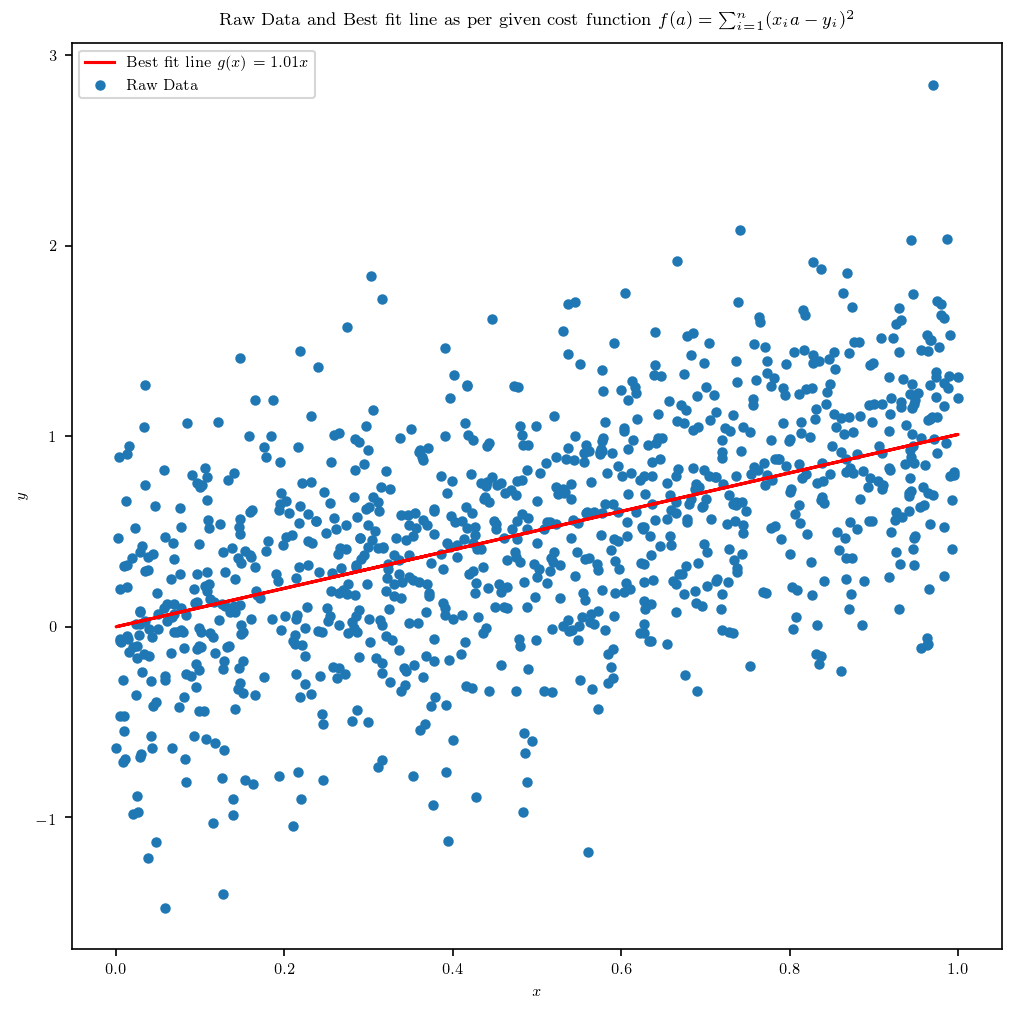

In [154]:
Nr = np.inner(x, y)
Dr = np.sum(x**2)
a = Nr/Dr
g = a*x

fig, ax = plt.subplots()
ax.scatter(x, y, label='Raw Data')
ax.plot(x, g, 'r-', label='Best fit line $g(x)=%.2fx$' % a)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Raw Data and Best fit line as per given cost function $f(a) = \sum_{i=1}^{n} (x_ia - y_i)^2$')
plt.legend()
plt.show()

**Polynomial fitting:**

Considering the polynomial of type: $p_d(x) = a_o + a_1x + a_2x^2 + ... + a_dx^d$
 with a problem of fitting this to the datset $D = (x_i, y_i)_{i=1}^{n}$ so as to minimize the squared error. 
 The related optimization task is to:
$min_a f(a)=\sum_{i=1}^{n}(p_d(x_i) - y_i)^2$

The evaluted optimum vector $a$ is: $a^* = (X^TX)^{-1}X^Ty$ or in other words
$a^* = X^{\dagger}y$ where $X^{\dagger}$ is the psuedo inverse of $X$ i.e. $X^{\dagger} =  (X^TX)^{-1}X^T$

The following code evaluates a new output as $y_i = 30(x_i - 0.25)^2(x_i - 0.75)^2 + \xi_i$ where $\xi_i$ is normally distributed with $\mu=0$ and $\sigma^2=0.01$ in the interval $[0, 1]$ and generates the scatter plot for this data. Then, the polynomial fit for $p_4(x)$ is used to plot best fit for this data. 

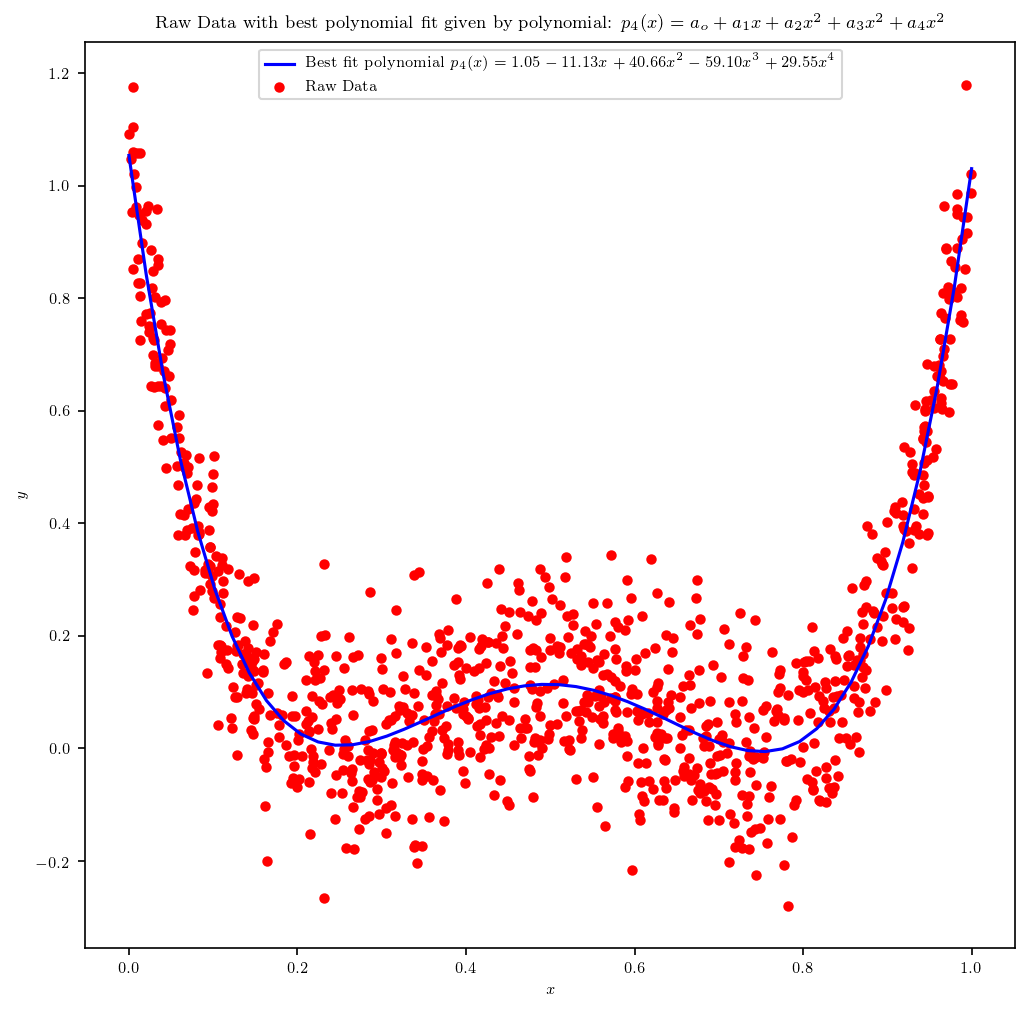

In [156]:
X = np.ones((x.shape[0], 1))
for i in range(1, 5):
  X = np.hstack((X, x.reshape(x.shape[0], 1) ** i))
XtX_inv = np.linalg.pinv(X)

psi = np.random.normal(0, 0.1, 1000)
y_prime = 30 * ((x - 0.25)**2) * ((x - 0.75)**2) + psi
Y = y_prime.reshape(y_prime.shape[0], 1)
a_prime = np.dot(XtX_inv , Y)

mT = np.linspace(0, 1, 50)[:, None] ** np.arange(4 + 1)[None, :]

label_string = '%.2f' % a_prime[0]
for i, coeff in enumerate(a_prime[1:]):
    if i == 0:
        label_string += ' %s %.2fx' % ('+' if coeff >= 0 else '-', abs(coeff))
    else:
        label_string += ' %s %.2fx^%d' % ('+' if coeff >= 0 else '-', abs(coeff), i + 1)

fig1, ax1 = plt.subplots()
ax1.scatter(x, y_prime, c='r', label='Raw Data')
ax1.plot(mT[:,1], mT @ a_prime , 'b-', label='Best fit polynomial $p_4(x)=%s$' % label_string)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Raw Data with best polynomial fit given by polynomial: $p_4(x) = a_o + a_1x + a_2x^2 + a_3x^2 + a_4x^2$')
plt.legend()
plt.show()